Rows: 13 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 129 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 85 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full c


========== DISTRICTS THAT MISSED 60% TARGET (n=13) ==========
# A tibble: 13 × 4
   District     Coverage Numerator Denominator
   <chr>           <dbl>     <dbl>       <dbl>
 1 Kono             10.1      3056      15786.
 2 Kambia           11.4      2739      12536.
 3 Koinadugu        12.2      2869      12212.
 4 Tonkolili        13.2      4131      16252.
 5 Port Loko        14.1      5814      21507.
 6 Bonthe           15.2      1957       6704.
 7 Bombali          18.0      6421      18647.
 8 Pujehun          21.6      4498      10838.
 9 Kailahun         21.7      6959      16713.
10 Moyamba          24.3      5723      12292.
11 Kenema           24.6     10962      23209.
12 Bo               25.7     10414      21134.
13 Western Area     55.6     38579      36180.

Coverage Statistics:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.09   13.25   17.95   20.60   24.28   55.60 


Coverage Bands:
# A tibble: 4 × 3
  Band                     n   Pct
  <chr>                <int> <dbl>
1 Critical (<15%)          5  38.5
2 Low (15-25%)             6  46.2
3 Moderate (25-40%)        1   7.7
4 Near Target (40-60%)     1   7.7

========== CHIEFDOMS THAT MISSED 60% TARGET (n=129) ==========

Coverage Statistics:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.80   11.70   19.65   20.73   28.27   56.07 


Coverage Bands:
# A tibble: 5 × 3
  Band                  n   Pct
  <chr>             <int> <dbl>
1 Critical (<10%)      26  20.2
2 Higher (40-60%)       6   4.7
3 Low (20-30%)         36  27.9
4 Moderate (30-40%)    22  17.1
5 Very Low (10-20%)    39  30.2

Worst 15 Chiefdoms:
# A tibble: 15 × 2
   Chiefdom          Coverage
   <chr>                <dbl>
 1 Maforki               1.8 
 2 Makari Gbanti         3.39
 3 BMC                   3.66
 4 Kholifa Rowalla       3.88
 5 Dama                  4.05
 6 Kaiyamba              4.48
 7 Bumpe Ngao            4.57
 8 Malal Mara            4.64
 9 Nongoba Bullum        5   
10 Sanda Loko            5.22
11 Nimiyama              5.34
12 Tankoro               5.55
13 Sella Limba           5.57
14 Folosaba Dembelia     6.56
15 Jong                  6.6 

Best 10 Chiefdoms (still below target):
# A tibble: 10 × 2
   Chiefdom           Coverage
   <chr>                 <dbl>
 1 Small Bo               56.1
 2 Selenga                49.5
 3 Sand

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.60   31.29   41.95   39.80   49.25   59.95 


Coverage Bands:
# A tibble: 4 × 3
  Band                  n   Pct
  <chr>             <int> <dbl>
1 Critical (<15%)       5   5.9
2 Higher (45-60%)      36  42.4
3 Low (15-30%)         13  15.3
4 Moderate (30-45%)    31  36.5

By Facility Type:
# A tibble: 4 × 6
  Type     Count Mean_Coverage Median_Coverage   Min   Max
  <chr>    <int>         <dbl>           <dbl> <dbl> <dbl>
1 CHP          1          29.0            29.0  29.0  29.0
2 Clinic       6          30.8            33.6  12.8  46.7
3 Hospital     7          34.3            33.2   0.6  56.5
4 CHC         71          41.2            43.1  10.7  60.0

Worst 10 Facilities:
# A tibble: 10 × 2
   Facility                  Coverage
   <chr>                        <dbl>
 1 Govt. Hosp. Makeni             0.6
 2 Jembe CHC                     10.7
 3 Koidu Under Five Clinic       12.8
 4 Bumpe CHC                     14.6
 5 Kamalo CHC                    14.9
 6 Gbap CHC                      18.1
 7 Gerehun CHC                   18.6

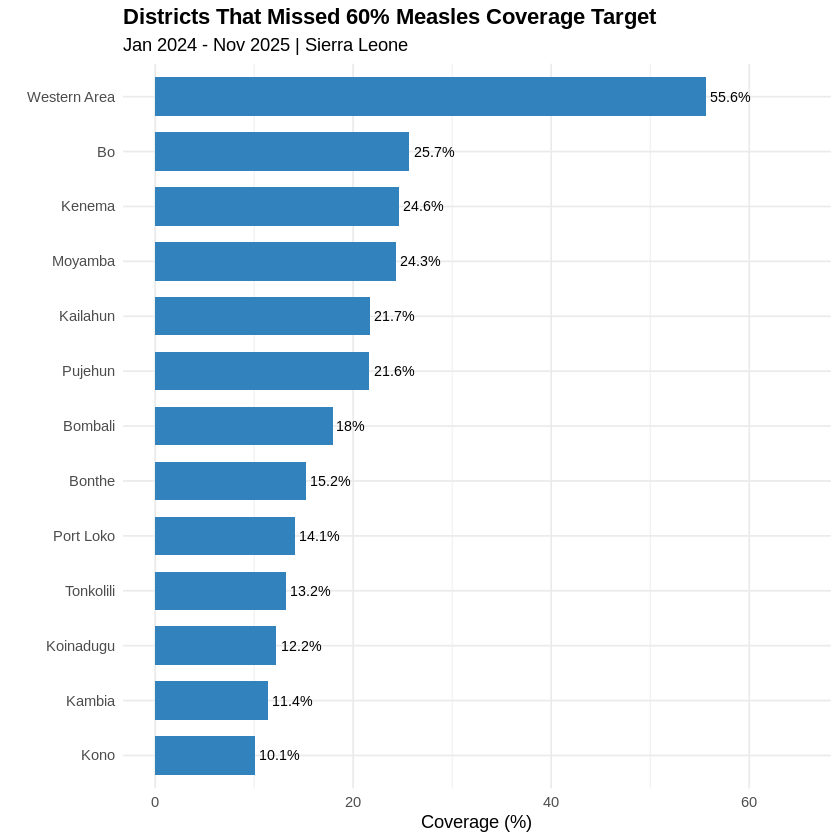

In [ ]:
# ============================================================================
# QUESTION 5: DRILL-DOWN + CHARACTERISTICS
# ============================================================================

library(tidyverse)

districts <- read_csv("../../Downloads/district.csv")
chiefdoms <- read_csv("../../Downloads/chiefdom.csv")
facilities <- read_csv("../../Downloads/facility.csv")

# ============================================================================
# DISTRICTS THAT MISSED TARGET
# ============================================================================

cat("\n========== DISTRICTS THAT MISSED 60% TARGET (n=13) ==========\n")

districts %>%
  rename(District = `Organisation unit`, Coverage = Value) %>%
  arrange(Coverage) %>%
  select(District, Coverage, Numerator, Denominator) %>%
  print(n = 15)

cat("\nCoverage Statistics:\n")
summary(districts$Value)

cat("\nCoverage Bands:\n")
districts %>%
  mutate(Band = case_when(
    Value < 15 ~ "Critical (<15%)",
    Value < 25 ~ "Low (15-25%)",
    Value < 40 ~ "Moderate (25-40%)",
    TRUE ~ "Near Target (40-60%)"
  )) %>%
  count(Band) %>%
  mutate(Pct = round(n / sum(n) * 100, 1)) %>%
  print()


# ============================================================================
# CHIEFDOMS THAT MISSED TARGET
# ============================================================================

cat("\n========== CHIEFDOMS THAT MISSED 60% TARGET (n=129) ==========\n")

cat("\nCoverage Statistics:\n")
summary(chiefdoms$Value)

cat("\nCoverage Bands:\n")
chiefdoms %>%
  mutate(Band = case_when(
    Value < 10 ~ "Critical (<10%)",
    Value < 20 ~ "Very Low (10-20%)",
    Value < 30 ~ "Low (20-30%)",
    Value < 40 ~ "Moderate (30-40%)",
    TRUE ~ "Higher (40-60%)"
  )) %>%
  count(Band) %>%
  mutate(Pct = round(n / sum(n) * 100, 1)) %>%
  print()

cat("\nWorst 15 Chiefdoms:\n")
chiefdoms %>%
  rename(Chiefdom = `Organisation unit`, Coverage = Value) %>%
  arrange(Coverage) %>%
  select(Chiefdom, Coverage) %>%
  head(15) %>%
  print()

cat("\nBest 10 Chiefdoms (still below target):\n")
chiefdoms %>%
  rename(Chiefdom = `Organisation unit`, Coverage = Value) %>%
  arrange(desc(Coverage)) %>%
  select(Chiefdom, Coverage) %>%
  head(10) %>%
  print()


# ============================================================================
# FACILITIES THAT MISSED TARGET
# ============================================================================

cat("\n========== FACILITIES THAT MISSED 60% TARGET (n=85) ==========\n")

cat("\nCoverage Statistics:\n")
summary(facilities$Value)

cat("\nCoverage Bands:\n")
facilities %>%
  mutate(Band = case_when(
    Value < 15 ~ "Critical (<15%)",
    Value < 30 ~ "Low (15-30%)",
    Value < 45 ~ "Moderate (30-45%)",
    TRUE ~ "Higher (45-60%)"
  )) %>%
  count(Band) %>%
  mutate(Pct = round(n / sum(n) * 100, 1)) %>%
  print()

cat("\nBy Facility Type:\n")
facilities %>%
  mutate(Type = case_when(
    str_detect(`Organisation unit`, "Hospital|Hosp\\.") ~ "Hospital",
    str_detect(`Organisation unit`, "CHP") ~ "CHP",
    str_detect(`Organisation unit`, "CHC") ~ "CHC",
    str_detect(`Organisation unit`, "Clinic") ~ "Clinic",
    TRUE ~ "Other"
  )) %>%
  group_by(Type) %>%
  summarise(
    Count = n(),
    Mean_Coverage = round(mean(Value), 2),
    Median_Coverage = round(median(Value), 2),
    Min = min(Value),
    Max = max(Value),
    .groups = "drop"
  ) %>%
  arrange(Mean_Coverage) %>%
  print()

cat("\nWorst 10 Facilities:\n")
facilities %>%
  rename(Facility = `Organisation unit`, Coverage = Value) %>%
  arrange(Coverage) %>%
  select(Facility, Coverage) %>%
  head(10) %>%
  print()

cat("\nBest 10 Facilities (still below target):\n")
facilities %>%
  rename(Facility = `Organisation unit`, Coverage = Value) %>%
  arrange(desc(Coverage)) %>%
  select(Facility, Coverage) %>%
  head(10) %>%
  print()


# ============================================================================
# SUMMARY TABLE
# ============================================================================

cat("\n========== SUMMARY TABLE ==========\n")
data.frame(
  Level = c("District", "Chiefdom", "Facility"),
  Count = c(nrow(districts), nrow(chiefdoms), nrow(facilities)),
  Min = c(min(districts$Value), min(chiefdoms$Value), min(facilities$Value)),
  Max = c(max(districts$Value), max(chiefdoms$Value), max(facilities$Value)),
  Mean = c(round(mean(districts$Value), 2), round(mean(chiefdoms$Value), 2), round(mean(facilities$Value), 2)),
  Median = c(round(median(districts$Value), 2), round(median(chiefdoms$Value), 2), round(median(facilities$Value), 2))
) %>% print()


# ============================================================================
# Q5 VISUALIZATION: District Bar Chart
# ============================================================================

p_q5 <- districts %>%
  rename(District = `Organisation unit`, Coverage = Value) %>%
  ggplot(aes(x = reorder(District, Coverage), y = Coverage)) +
  geom_bar(stat = "identity", fill = "#3182bd", width = 0.7) +
  geom_text(aes(label = paste0(round(Coverage, 1), "%")), hjust = -0.1, size = 3) +
  coord_flip() +
  labs(
    title = "Districts That Missed 60% Measles Coverage Target",
    subtitle = "Jan 2024 - Nov 2025 | Sierra Leone",
    x = NULL,
    y = "Coverage (%)"
  ) +
  ylim(0, 65) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold"))

print(p_q5)

Rows: 13 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 129 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 85 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full c


========== COVERAGE DISTRIBUTION PATTERN ==========

By Administrative Level:
     Level   N  Mean Median   Min   Max
1 District  13 20.60  17.95 10.09 55.60
2 Chiefdom 129 20.73  19.65  1.80 56.07
3 Facility  85 39.80  41.95  0.60 59.95

========== CONCENTRATION AT LOW COVERAGE ==========

Percentage of units below thresholds:

Districts (n=13):
  Below 20%: 53.8 %
  Below 30%: 92.3 %

Chiefdoms (n=129):
  Below 20%: 50.4 %
  Below 30%: 78.3 %

Facilities (n=85):
  Below 20%: 8.2 %
  Below 30%: 21.2 %


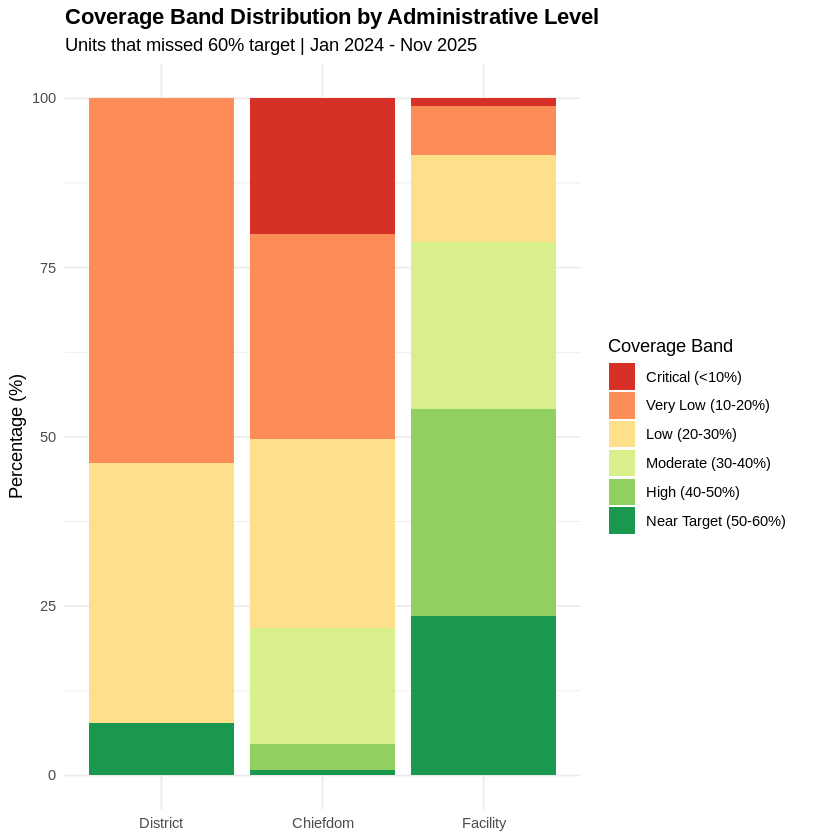

In [ ]:
# ============================================================================
# QUESTION 6: TYPE OF TREND + VISUALIZATION
# ============================================================================

library(tidyverse)

districts <- read_csv("../../Downloads/district.csv")
chiefdoms <- read_csv("../../Downloads/chiefdom.csv")
facilities <- read_csv("../../Downloads/facility.csv")

# ============================================================================
# TREND STATISTICS
# ============================================================================

cat("\n========== COVERAGE DISTRIBUTION PATTERN ==========\n")

cat("\nBy Administrative Level:\n")
data.frame(
  Level = c("District", "Chiefdom", "Facility"),
  N = c(nrow(districts), nrow(chiefdoms), nrow(facilities)),
  Mean = c(round(mean(districts$Value), 2), round(mean(chiefdoms$Value), 2), round(mean(facilities$Value), 2)),
  Median = c(round(median(districts$Value), 2), round(median(chiefdoms$Value), 2), round(median(facilities$Value), 2)),
  Min = c(min(districts$Value), min(chiefdoms$Value), min(facilities$Value)),
  Max = c(max(districts$Value), max(chiefdoms$Value), max(facilities$Value))
) %>% print()


cat("\n========== CONCENTRATION AT LOW COVERAGE ==========\n")

cat("\nPercentage of units below thresholds:\n\n")

cat("Districts (n=13):\n")
cat("  Below 20%:", round(sum(districts$Value < 20) / nrow(districts) * 100, 1), "%\n")
cat("  Below 30%:", round(sum(districts$Value < 30) / nrow(districts) * 100, 1), "%\n")

cat("\nChiefdoms (n=129):\n")
cat("  Below 20%:", round(sum(chiefdoms$Value < 20) / nrow(chiefdoms) * 100, 1), "%\n")
cat("  Below 30%:", round(sum(chiefdoms$Value < 30) / nrow(chiefdoms) * 100, 1), "%\n")

cat("\nFacilities (n=85):\n")
cat("  Below 20%:", round(sum(facilities$Value < 20) / nrow(facilities) * 100, 1), "%\n")
cat("  Below 30%:", round(sum(facilities$Value < 30) / nrow(facilities) * 100, 1), "%\n")


# ============================================================================
# Q6 VISUALIZATION: Stacked Bar - Coverage Band Distribution
# ============================================================================

coverage_bands <- function(df, level_name) {
  df %>%
    mutate(Band = case_when(
      Value < 10 ~ "Critical (<10%)",
      Value < 20 ~ "Very Low (10-20%)",
      Value < 30 ~ "Low (20-30%)",
      Value < 40 ~ "Moderate (30-40%)",
      Value < 50 ~ "High (40-50%)",
      TRUE ~ "Near Target (50-60%)"
    )) %>%
    count(Band) %>%
    mutate(Pct = round(n / sum(n) * 100, 1), Level = level_name)
}

all_bands <- bind_rows(
  coverage_bands(districts, "District"),
  coverage_bands(chiefdoms, "Chiefdom"),
  coverage_bands(facilities, "Facility")
)

all_bands$Band <- factor(all_bands$Band, levels = c(
  "Critical (<10%)", "Very Low (10-20%)", "Low (20-30%)",
  "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"
))
all_bands$Level <- factor(all_bands$Level, levels = c("District", "Chiefdom", "Facility"))

p_q6 <- ggplot(all_bands, aes(x = Level, y = Pct, fill = Band)) +
  geom_bar(stat = "identity", position = "stack") +
  scale_fill_manual(values = c(
    "Critical (<10%)" = "#d73027",
    "Very Low (10-20%)" = "#fc8d59",
    "Low (20-30%)" = "#fee08b",
    "Moderate (30-40%)" = "#d9ef8b",
    "High (40-50%)" = "#91cf60",
    "Near Target (50-60%)" = "#1a9850"
  )) +
  labs(
    title = "Coverage Band Distribution by Administrative Level",
    subtitle = "Units that missed 60% target | Jan 2024 - Nov 2025",
    x = NULL,
    y = "Percentage (%)",
    fill = "Coverage Band"
  ) +
  theme_minimal() +
  theme(plot.title = element_text(face = "bold"))

print(p_q6)

Rows: 13 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


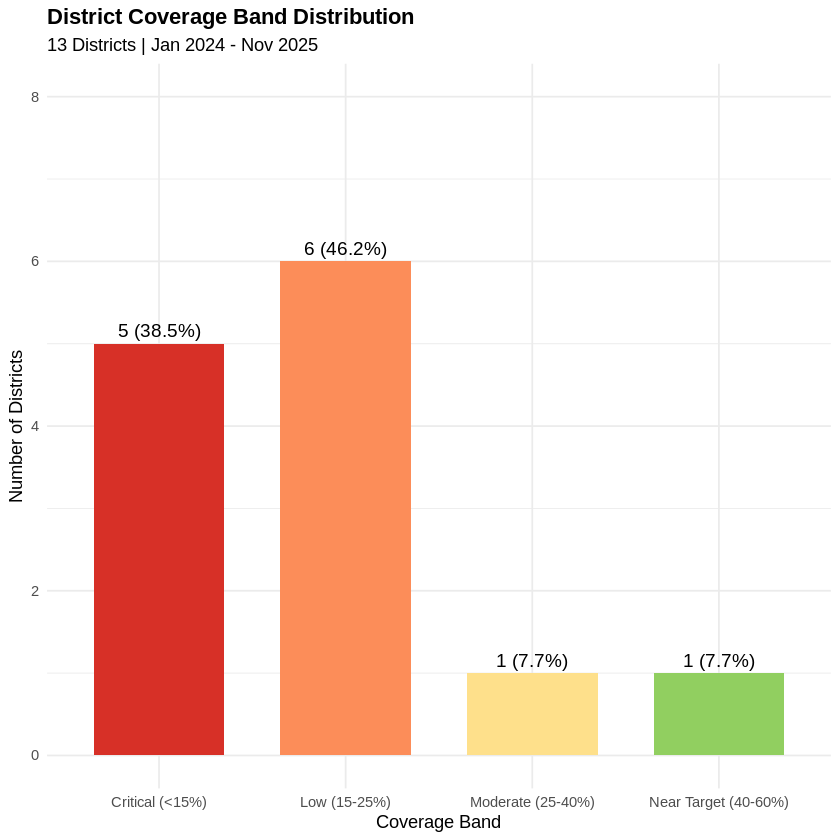

In [ ]:
# Coverage Band Visualization for Districts Only

library(tidyverse)

districts <- read_csv("../../Downloads/district.csv")

# Create coverage bands
district_bands <- districts %>%
  mutate(Band = case_when(
    Value < 15 ~ "Critical (<15%)",
    Value < 25 ~ "Low (15-25%)",
    Value < 40 ~ "Moderate (25-40%)",
    TRUE ~ "Near Target (40-60%)"
  )) %>%
  count(Band) %>%
  mutate(Pct = round(n / sum(n) * 100, 1))

district_bands$Band <- factor(district_bands$Band, levels = c(
  "Critical (<15%)", "Low (15-25%)", "Moderate (25-40%)", "Near Target (40-60%)"
))

# Bar chart
ggplot(district_bands, aes(x = Band, y = n, fill = Band)) +
  geom_bar(stat = "identity", width = 0.7) +
  geom_text(aes(label = paste0(n, " (", Pct, "%)")), vjust = -0.5, size = 4) +
  scale_fill_manual(values = c(
    "Critical (<15%)" = "#d73027",
    "Low (15-25%)" = "#fc8d59",
    "Moderate (25-40%)" = "#fee08b",
    "Near Target (40-60%)" = "#91cf60"
  )) +
  labs(
    title = "District Coverage Band Distribution",
    subtitle = "13 Districts | Jan 2024 - Nov 2025",
    x = "Coverage Band",
    y = "Number of Districts"
  ) +
  ylim(0, 8) +
  theme_minimal() +
  theme(
    plot.title = element_text(face = "bold"),
    legend.position = "none"
  )

Rows: 13 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 4
  Band                     n   Pct Label                           
  <fct>                <int> <dbl> <chr>                           
1 Critical (<15%)          5  38.5 "Critical (<15%)\n5 (38.5%)"    
2 High (40-50%)            0   0   "High (40-50%)\n0 (0%)"         
3 Low (20-30%)             5  38.5 "Low (20-30%)\n5 (38.5%)"       
4 Moderate (30-40%)        0   0   "Moderate (30-40%)\n0 (0%)"     
5 Near Target (50-60%)     1   7.7 "Near Target (50-60%)\n1 (7.7%)"
6 Very Low (15-20%)        2  15.4 "Very Low (15-20%)\n2 (15.4%)"  


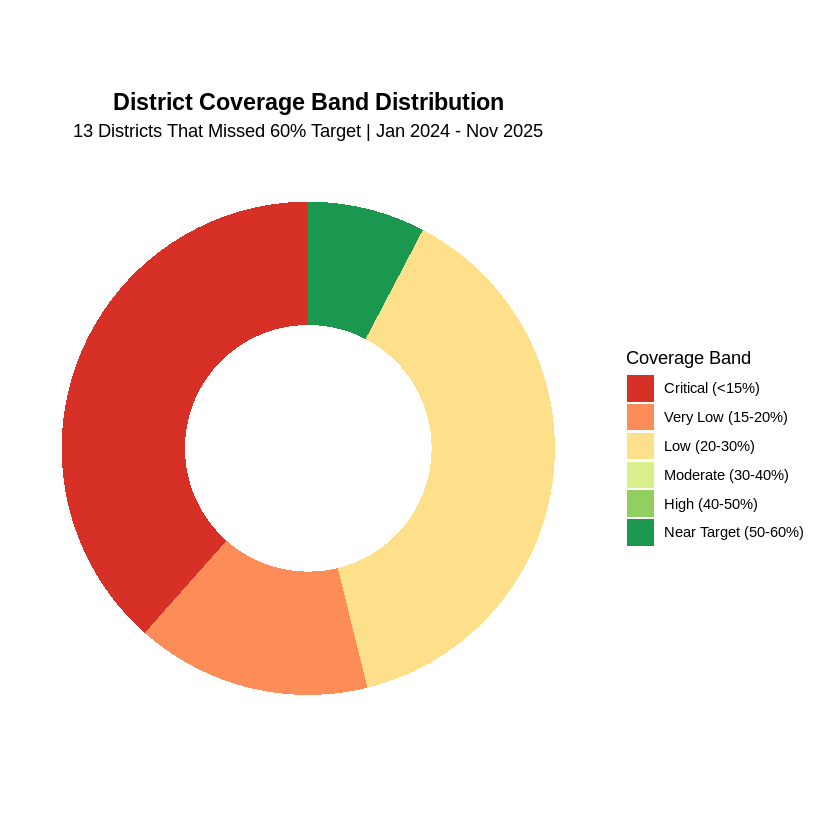

In [ ]:
# Donut Chart for District Coverage Bands
# Ensures all 6 bands appear even if empty

library(tidyverse)

districts <- read_csv("../../Downloads/district.csv")

# Create coverage bands with complete() to ensure all levels appear
district_bands <- districts %>%
  mutate(Band = case_when(
    Value < 15 ~ "Critical (<15%)",
    Value < 20 ~ "Very Low (15-20%)",
    Value < 30 ~ "Low (20-30%)",
    Value < 40 ~ "Moderate (30-40%)",
    Value < 50 ~ "High (40-50%)",
    TRUE ~ "Near Target (50-60%)"
  )) %>%
  count(Band) %>%
  # Ensure all bands appear
  complete(Band = c("Critical (<15%)", "Very Low (15-20%)", "Low (20-30%)",
                    "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"),
           fill = list(n = 0)) %>%
  mutate(
    Pct = round(n / sum(n) * 100, 1),
    Label = paste0(Band, "\n", n, " (", Pct, "%)")
  )

district_bands$Band <- factor(district_bands$Band, levels = c(
  "Critical (<15%)", "Very Low (15-20%)", "Low (20-30%)",
  "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"
))

# Print to see the data
print(district_bands)

# Donut chart
ggplot(district_bands, aes(x = 2, y = n, fill = Band)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  scale_fill_manual(
    values = c(
      "Critical (<15%)" = "#d73027",
      "Very Low (15-20%)" = "#fc8d59",
      "Low (20-30%)" = "#fee08b",
      "Moderate (30-40%)" = "#d9ef8b",
      "High (40-50%)" = "#91cf60",
      "Near Target (50-60%)" = "#1a9850"
    ),
    drop = FALSE  # This ensures all levels show in legend even if n=0
  ) +
  labs(
    title = "District Coverage Band Distribution",
    subtitle = "13 Districts That Missed 60% Target | Jan 2024 - Nov 2025",
    fill = "Coverage Band"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "right"
  )

Rows: 129 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 4
  Band                     n   Pct Label                           
  <fct>                <int> <dbl> <chr>                           
1 Critical (<10%)         26  20.2 "Critical (<10%)\n26 (20.2%)"   
2 High (40-50%)            5   3.9 "High (40-50%)\n5 (3.9%)"       
3 Low (20-30%)            36  27.9 "Low (20-30%)\n36 (27.9%)"      
4 Moderate (30-40%)       22  17.1 "Moderate (30-40%)\n22 (17.1%)" 
5 Near Target (50-60%)     1   0.8 "Near Target (50-60%)\n1 (0.8%)"
6 Very Low (10-20%)       39  30.2 "Very Low (10-20%)\n39 (30.2%)" 


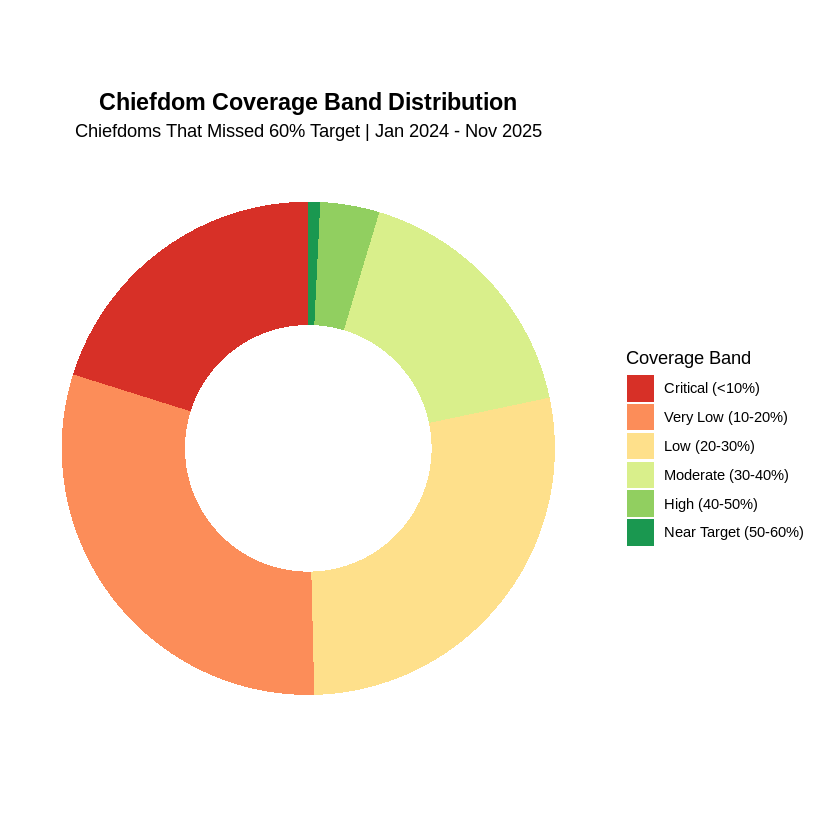

In [ ]:
# Donut Chart for Chiefdom Coverage Bands
# Ensures all 6 bands appear even if empty

library(tidyverse)

chiefdoms <- read_csv("../../Downloads/chiefdom.csv")

# Create coverage bands with complete() to ensure all levels appear
chiefdom_bands <- chiefdoms %>%
  mutate(Band = case_when(
    Value < 10 ~ "Critical (<10%)",
    Value < 20 ~ "Very Low (10-20%)",
    Value < 30 ~ "Low (20-30%)",
    Value < 40 ~ "Moderate (30-40%)",
    Value < 50 ~ "High (40-50%)",
    TRUE ~ "Near Target (50-60%)"
  )) %>%
  count(Band) %>%
  # Ensure all bands appear
  complete(Band = c("Critical (<10%)", "Very Low (10-20%)", "Low (20-30%)",
                    "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"),
           fill = list(n = 0)) %>%
  mutate(
    Pct = round(n / sum(n) * 100, 1),
    Label = paste0(Band, "\n", n, " (", Pct, "%)")
  )

chiefdom_bands$Band <- factor(chiefdom_bands$Band, levels = c(
  "Critical (<10%)", "Very Low (10-20%)", "Low (20-30%)",
  "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"
))

# Print to see the data
print(chiefdom_bands)

# Donut chart
ggplot(chiefdom_bands, aes(x = 2, y = n, fill = Band)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  scale_fill_manual(
    values = c(
      "Critical (<10%)" = "#d73027",
      "Very Low (10-20%)" = "#fc8d59",
      "Low (20-30%)" = "#fee08b",
      "Moderate (30-40%)" = "#d9ef8b",
      "High (40-50%)" = "#91cf60",
      "Near Target (50-60%)" = "#1a9850"
    ),
    drop = FALSE  # This ensures all levels show in legend even if n=0
  ) +
  labs(
    title = "Chiefdom Coverage Band Distribution",
    subtitle = "Chiefdoms That Missed 60% Target | Jan 2024 - Nov 2025",
    fill = "Coverage Band"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "right"
  )

Rows: 85 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Facility Type Distribution:
# A tibble: 3 × 4
  Type      n   Pct Label              
  <chr> <int> <dbl> <chr>              
1 CHC      71  83.5 "CHC\n71 (83.5%)"  
2 CHP       1   1.2 "CHP\n1 (1.2%)"    
3 Other    13  15.3 "Other\n13 (15.3%)"


Warning message in geom_bar(stat = "identity", width = 1, color = "white", size = 1.5):
“Ignoring unknown parameters: `size`”


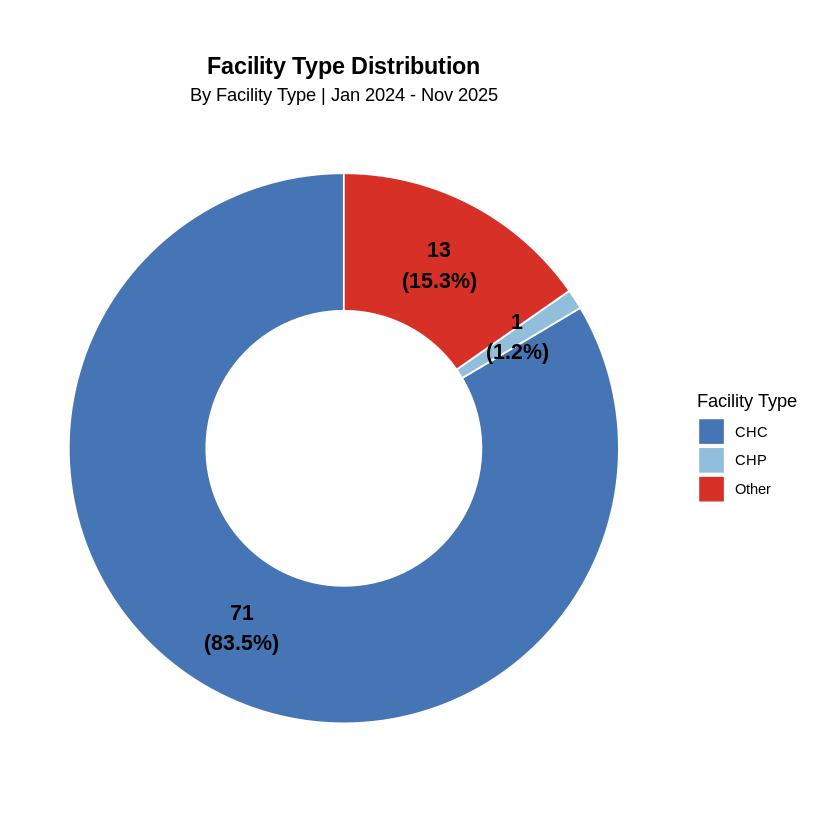

In [ ]:
# Donut Chart for Facility Type Distribution
# Shows distribution of facilities by type (CHC, CHP, MCHP)

library(tidyverse)

facilities <- read_csv("../../Downloads/facility.csv")

# Rename columns
facilities <- facilities %>%
  rename(Facility = `Organisation unit`, Coverage = Value)

# Extract facility type from facility name
facility_type_data <- facilities %>%
  mutate(
    Type = case_when(
      str_detect(Facility, "CHC") ~ "CHC",
      str_detect(Facility, "CHP") ~ "CHP",
      str_detect(Facility, "MCHP") ~ "MCHP",
      TRUE ~ "Other"
    )
  ) %>%
  count(Type) %>%
  mutate(
    Pct = round(n / sum(n) * 100, 1),
    Label = paste0(Type, "\n", n, " (", Pct, "%)")
  )

# Print to see the data
cat("\nFacility Type Distribution:\n")
print(facility_type_data)

# Donut chart
ggplot(facility_type_data, aes(x = 2, y = n, fill = Type)) +
  geom_bar(stat = "identity", width = 1, color = "white", size = 1.5) +
  geom_text(aes(label = paste0(n, "\n(", Pct, "%)")),
            position = position_stack(vjust = 0.5),
            size = 4.5,
            fontface = "bold") +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  scale_fill_manual(values = c(
    "CHC" = "#4575b4",
    "CHP" = "#91bfdb",
    "MCHP" = "#fee090",
    "Other" = "#d73027"
  )) +
  labs(
    title = "Facility Type Distribution",
    subtitle = "By Facility Type | Jan 2024 - Nov 2025",
    fill = "Facility Type"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "right"
  )

Rows: 85 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Data, Organisation unit
dbl (6): Value, Numerator, Denominator, Factor, Multiplier, Divisor

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 6 × 4
  Band                     n   Pct Label                             
  <fct>                <int> <dbl> <chr>                             
1 Critical (<10%)          1   1.2 "Critical (<10%)\n1 (1.2%)"       
2 High (40-50%)           26  30.6 "High (40-50%)\n26 (30.6%)"       
3 Low (20-30%)            11  12.9 "Low (20-30%)\n11 (12.9%)"        
4 Moderate (30-40%)       21  24.7 "Moderate (30-40%)\n21 (24.7%)"   
5 Near Target (50-60%)    20  23.5 "Near Target (50-60%)\n20 (23.5%)"
6 Very Low (10-20%)        6   7.1 "Very Low (10-20%)\n6 (7.1%)"     


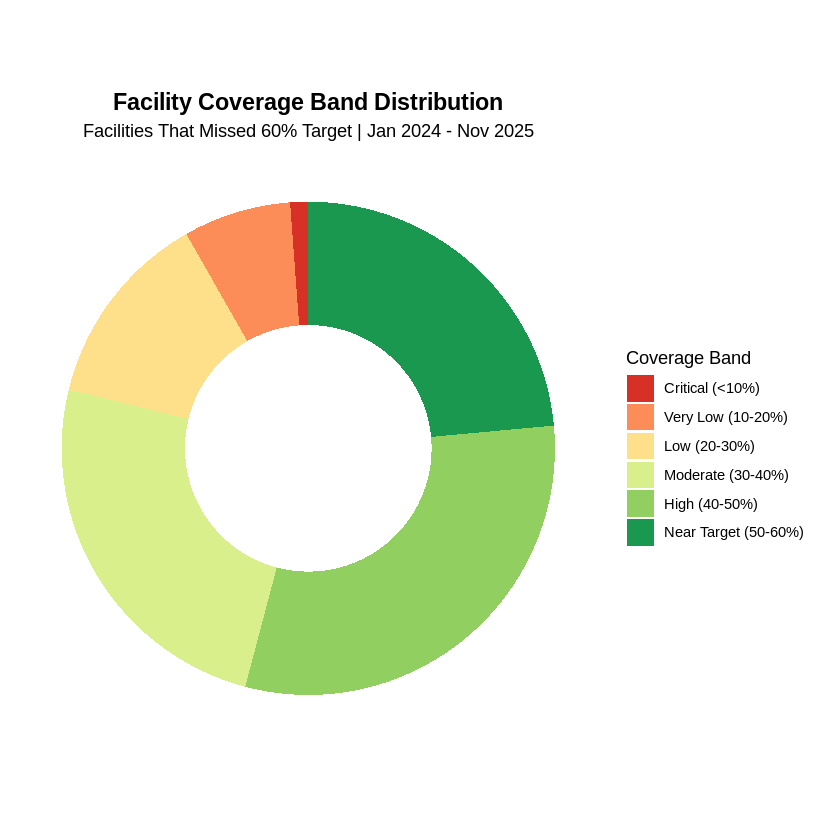

In [ ]:
# Donut Chart for Facility Coverage Bands
# Ensures all 6 bands appear even if empty

library(tidyverse)

facilities <- read_csv("../../Downloads/facility.csv")

# Rename columns for easier handling
facilities <- facilities %>%
  rename(Facility = `Organisation unit`, Coverage = Value)

# Create coverage bands (facility-specific thresholds - same as chiefdoms: <10%)
facility_bands <- facilities %>%
  mutate(Band = case_when(
    Coverage < 10 ~ "Critical (<10%)",
    Coverage < 20 ~ "Very Low (10-20%)",
    Coverage < 30 ~ "Low (20-30%)",
    Coverage < 40 ~ "Moderate (30-40%)",
    Coverage < 50 ~ "High (40-50%)",
    TRUE ~ "Near Target (50-60%)"
  )) %>%
  count(Band) %>%
  # Ensure all bands appear
  complete(Band = c("Critical (<10%)", "Very Low (10-20%)", "Low (20-30%)",
                    "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"),
           fill = list(n = 0)) %>%
  mutate(
    Pct = round(n / sum(n) * 100, 1),
    Label = paste0(Band, "\n", n, " (", Pct, "%)")
  )

facility_bands$Band <- factor(facility_bands$Band, levels = c(
  "Critical (<10%)", "Very Low (10-20%)", "Low (20-30%)",
  "Moderate (30-40%)", "High (40-50%)", "Near Target (50-60%)"
))

# Print to see the data
print(facility_bands)

# Donut chart
ggplot(facility_bands, aes(x = 2, y = n, fill = Band)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar(theta = "y") +
  xlim(0.5, 2.5) +
  scale_fill_manual(
    values = c(
      "Critical (<10%)" = "#d73027",
      "Very Low (10-20%)" = "#fc8d59",
      "Low (20-30%)" = "#fee08b",
      "Moderate (30-40%)" = "#d9ef8b",
      "High (40-50%)" = "#91cf60",
      "Near Target (50-60%)" = "#1a9850"
    ),
    drop = FALSE  # This ensures all levels show in legend even if n=0
  ) +
  labs(
    title = "Facility Coverage Band Distribution",
    subtitle = "Facilities That Missed 60% Target | Jan 2024 - Nov 2025",
    fill = "Coverage Band"
  ) +
  theme_void() +
  theme(
    plot.title = element_text(face = "bold", hjust = 0.5, size = 14),
    plot.subtitle = element_text(hjust = 0.5),
    legend.position = "right"
  )